In [9]:
import os, sys
import networkx as nx
sys.path.append('../../../')
import Holes as ho
import pickle as pk
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

Read the network in a graph object:

/home/marco/.local/lib/python3.5/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


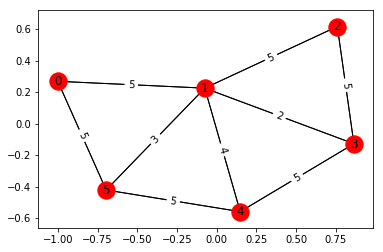

In [3]:
G = nx.Graph()
G.add_edge(0,1,weight=5)
G.add_edge(1,2,weight=5)
G.add_edge(2,3,weight=5)
G.add_edge(3,4,weight=5)
G.add_edge(4,5,weight=5)
G.add_edge(0,5,weight=5)
G.add_edge(1,3,weight=2)
G.add_edge(1,5,weight=3)
G.add_edge(1,4,weight=4);
pos = nx.spring_layout(G);
nx.draw_networkx(G, pos);
nx.draw_networkx_edges(G, pos);
nx.draw_networkx_edge_labels(G,pos,edge_labels=nx.get_edge_attributes(G,'weight'));
#G.add_edge(4,100,weight=1)

In [4]:
fil = ho.filtrations.standard_weight_clique_rank_filtration(G)

Preliminary scan of edge weights to define filtration steps...
Constructing filtration...
Max filtration value: 3
Clique dictionary created.


In [5]:
fil

{'[0, 1, 5]': ['2', '3'],
 '[0, 1]': ['0', '5'],
 '[0, 5]': ['0', '5'],
 '[0]': ['0', '5'],
 '[1, 2, 3]': ['3', '2'],
 '[1, 2]': ['0', '5'],
 '[1, 3, 4]': ['3', '2'],
 '[1, 3]': ['3', '2'],
 '[1, 4, 5]': ['2', '3'],
 '[1, 4]': ['1', '4'],
 '[1, 5]': ['2', '3'],
 '[1]': ['0', '5'],
 '[2, 3]': ['0', '5'],
 '[2]': ['0', '5'],
 '[3, 4]': ['0', '5'],
 '[3]': ['0', '5'],
 '[4, 5]': ['0', '5'],
 '[4]': ['0', '5'],
 '[5]': ['0', '5']}

In [6]:
outfile = 'output_perseus/perseus_filtration_file.txt'
if os.path.exists(outfile):
    os.remove(outfile);
ho.write_perseus_filtration(fil,outfile)

In [7]:
def perseus_intervals(betti_file,infinite_or_not=1):
    '''
    This is a brute Python translation of Vidit Nanda's original Matlab script.
    
    
    output_file: name of file containing the perseus output
    plot_type: 0 plots ALL intervals
               1 plots only intervals that die
    '''
    
    
    # extract birth and death indices
    ints = np.genfromtxt(betti_file);

    # extract indices of those intervals which die
    if infinite_or_not==False:
        ints = ints[deaths != -1];
    return ints;

In [10]:
intervals = perseus_intervals('../notebooks/output_perseus/output_1.txt')

In [11]:
intervals

array([[2., 3.],
       [1., 4.]])